<a id='top'></a>

# Complex vibration modes

Complex vibration modes arise in experimental research and numerical simulations when non proportional damping is adopted. In such cases a state space formulation of the second order differential dynamic equilibrium equation is the preferred way to adress the problem.

This notebook is inspired in one of [Pete Avitabile's Modal Space articles](http://macl.caeds.eng.uml.edu/umlspace/mspace.html), namely the one discussing the difference between [complex modes and real normal modes](http://sem.org/ArtDownLoad/msmj02.pdf). Additional information about state space formulation in structural dynamics can be found for example [here](http://dspace.mit.edu/bitstream/handle/1721.1/38777/35332523.pdf).

## Table of contents

[Preamble](#Preamble)

[Dynamic equilibrium equation](#Dynamic-equilibrium-equation)

[State space formulation](#State-space-formulation)

[Dynamic system setup](#Dynamic-system-setup)

[Undamped system](#Undamped-system)

[Proportionally damped system](#Proportionally-damped-system)

[Non proportionally damped system](#Non-proportionally-damped-system)

[Conclusions](#Conclusions)

[Odds and ends](#Odds-and-ends)

## Preamble

We will start by setting up the computational environment for this notebook. Furthermore, we will need numpy and scipy for the numerical simulations and matplotlib for the plots:

In [1]:
import sys
import numpy as np
import scipy as sp
import matplotlib as mpl

print('System: {}'.format(sys.version))
print('numpy version: {}'.format(np.__version__))
print('scipy version: {}'.format(sp.__version__))
print('matplotlib version: {}'.format(mpl.__version__))

System: 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
numpy version: 1.11.2
scipy version: 0.18.1
matplotlib version: 1.5.3


We will also need a couple of specific modules and a litle "IPython magic" to show the plots:

In [2]:
from numpy import linalg as LA
import matplotlib.pyplot as plt

%matplotlib inline

[Back to top](#top)

## Dynamic equilibrium equation

In structural dynamics the second order differential dynamic equilibrium equation can be written in terms of generalized coordinates (d[isplacement]) and their first (v[elocity]) and second (a[cceleration]) time derivatives:

\begin{equation}
\mathbf{M} \times \mathbf{a(t)} + \mathbf{C} \times \mathbf{v(t)} + \mathbf{K} \times \mathbf{d(t)} = \mathbf{F(t)}
\end{equation}

where:

> $\mathbf{M}$ is the mass matrix  
> $\mathbf{C}$ is the damping matrix  
> $\mathbf{K}$ is the stiffness matrix  
> $\mathbf{a(t)}$ is the acceleration vector  
> $\mathbf{v(t)}$ is the velocity vector  
> $\mathbf{d(t)}$ is the displacement vector  
> $\mathbf{F(t)}$ is the force input vector  

All these matrices are of size $NDOF \times NDOF$, where $NDOF$ is the number of generalized degrees of freedom of the dynamic system.

[Back to top](#top)

## State space formulation

In a [state space formulation](http://en.wikipedia.org/wiki/State-space_representation) the second order differential dynamic equilibrium equation is turned into a system of first order differential dynamic equilibrium equations:

\begin{equation}
\begin{matrix}
\mathbf{\dot{x}(t)} = \mathbf{A} \cdot \mathbf{x(t)} + \mathbf{B} \cdot \mathbf{u(t)} \\
\mathbf{y(t)} = \mathbf{C} \cdot \mathbf{x(t)} + \mathbf{D} \cdot \mathbf{u(t)}
\end{matrix}
\end{equation}

where

> $\mathbf{A}$ is the system matrix  
> $\mathbf{B}$ is the imput matrix  
> $\mathbf{C}$ is the output matrix  
> $\mathbf{D}$ is the feedthrough matrix  
> $\mathbf{x(t)}$ is the state vector  
> $\mathbf{y(t)}$ is the output vector  
> $\mathbf{u(t)}$ is the input vector  

The state vector, of size $2 \times NDOF$ by $1$, has the following form:

\begin{equation}
\mathbf{x(t)} = \left[ \begin{matrix}
\mathbf{u(t)} \\
\mathbf{\dot{u}(t)}
\end{matrix} \right]
\end{equation}

The system matrix, of size $2 \times NDOF$ by $2 \times NDOF$, is built using the M, C and K matrices:

\begin{equation*}
\mathbf{A} = \left[ \begin{matrix}
\mathbf{0} & \mathbf{I} \\
-\mathbf{M}^{-1} \cdot \mathbf{K} & -\mathbf{M}^{-1} \cdot \mathbf{C}
\end{matrix} \right]
\end{equation*}

The loading matrix, of size $2 \times NDOF$ by $1$, is composed of 0's and 1's.

[Back to top](#top)

## Dynamic system setup

In this example we will use the folowing mass and stiffness matrices:

In [3]:
MM = np.matrix(np.diag([2,3]))
print(MM)

[[2 0]
 [0 3]]


In [4]:
KK = np.matrix([[2, -1],[-1, 1]])
print(KK)

[[ 2 -1]
 [-1  1]]


Let us perform the eigenanalysis of the (undamped) second order differential dynamic equilibrium equation for later comparison of results:

In [5]:
W2, F1 = LA.eig(LA.solve(MM,KK)) # eigenanalysis
ix = np.argsort(np.absolute(W2)) # sort eigenvalues in ascending order
W2 = W2[ix] # sorted eigenvalues
F1 = F1[:,ix] # sorted eigenvectors
print(np.round_(W2, 4))
print(np.round_(F1, 4))

[ 0.1396  1.1937]
[[ 0.5025  0.9325]
 [ 0.8646 -0.3613]]


The angular frequencies are computed as the square root of the eigenvalues:

In [6]:
print(np.sqrt(W2))

[ 0.37365812  1.09257171]


The modal vectors, the columns of the modal matrix, have unit norm:

In [7]:
print(LA.norm(F1, axis=0))

[ 1.  1.]


[Back to top](#top)

## Undamped system

In the undamped system, the damping matrix is all zeros:

In [8]:
C0 = np.matrix(np.zeros_like(MM))
print(C0)

[[0 0]
 [0 0]]


The system matrix is the following:

In [9]:
A = np.bmat([[np.zeros_like(MM), np.identity(MM.shape[0])], [LA.solve(-MM,KK), LA.solve(-MM,C0)]])
print(A)

[[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [-1.          0.5        -0.         -0.        ]
 [ 0.33333333 -0.33333333 -0.         -0.        ]]


Performing the eigenanalysis on this matrix yields the following complex valued results:

In [10]:
w0, v0 = LA.eig(A)
ix = np.argsort(np.absolute(w0))
w0 = w0[ix]
v0 = v0[:,ix]
print(np.round_(w0, 4))
print(np.round_(v0, 4))

[ 0.+0.3737j  0.-0.3737j -0.+1.0926j -0.-1.0926j]
[[ 0.4707+0.j      0.4707-0.j     -0.0000-0.6296j -0.0000+0.6296j]
 [ 0.8099+0.j      0.8099-0.j      0.0000+0.2439j  0.0000-0.2439j]
 [-0.0000+0.1759j -0.0000-0.1759j  0.6878+0.j      0.6878-0.j    ]
 [-0.0000+0.3026j -0.0000-0.3026j -0.2665-0.j     -0.2665+0.j    ]]


As we can see, the eigenvalues come in complex conjugate pairs. Therefore we can take for instance only the ones in the [upper half-plane](http://en.wikipedia.org/wiki/Upper_half-plane):

In [11]:
print(np.round_(w0[[0,2]], 4))

[ 0.+0.3737j -0.+1.0926j]


In this case, since damping is zero, the real part of the complex eigenvalues is also zero (apart from [round-off errors](http://en.wikipedia.org/wiki/Round-off_error)) and the imaginary part is equal to the angular frequency computed previously for the dynamic system:

In [12]:
print(w0[[0,2]].imag)

[ 0.37365812  1.09257171]


The columns of the modal matrix, the modal vectors, also come in conjugate pairs. Each vector has unit norm as in the dynamic system:

In [13]:
print(LA.norm(v0[:,[0,2]], axis=0))

[ 1.  1.]


Moreover, we can check that the modal matrix is composed of four blocks, each with $NDOF \times NDOF$ dimension. Some column reordering is necessary in order to match both modal matrices:

In [14]:
AA = v0[:2,[0,2]]
AB = AA.conjugate()
BA = np.multiply(AA,w0[[0,2]])
BB = BA.conjugate()
v0_new = np.bmat([[AA, AB], [BA, BB]])
print(np.round_(v0_new[:,[0,2,1,3]], 4))

[[ 0.4707+0.j      0.4707-0.j     -0.0000-0.6296j -0.0000+0.6296j]
 [ 0.8099+0.j      0.8099-0.j      0.0000+0.2439j  0.0000-0.2439j]
 [-0.0000+0.1759j -0.0000-0.1759j  0.6878+0.j      0.6878-0.j    ]
 [ 0.0000+0.3026j  0.0000-0.3026j -0.2665+0.j     -0.2665-0.j    ]]


To help visualize the complex valued modal vectors we will do a polar plot of the corresponding amplitudes and angles:

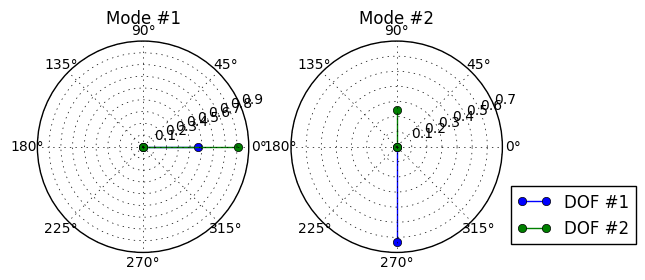

In [15]:
fig, ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))
for mode in range(2):
    ax[mode].set_title('Mode #{}'.format(mode+1))
    for dof in range(2):
        r = np.array([0, np.absolute(v0[dof,2*mode])])
        t = np.array([0, np.angle(v0[dof,2*mode])])
        ax[mode].plot(t, r, 'o-', label='DOF #{}'.format(dof+1))
plt.legend(loc='lower left', bbox_to_anchor=(1., 0.))
plt.show()

[Back to top](#top)

## Proportionally damped system

In a proportionally damped system, the damping matrix is proportional to the mass and stiffness matrices:

\begin{equation*}
\mathbf{C} = \alpha \times \mathbf{M} + \beta \times \mathbf{K}
\end{equation*}

Let us assume $\alpha$ to be 0.1 and $\beta$ to be 0.1. This yields the following damping matrix:

In [16]:
C1 = 0.1*MM+0.1*KK
print(C1)

[[ 0.4 -0.1]
 [-0.1  0.4]]


This damping matrix is orthogonal because the mass and stiffness matrices are also orthogonal:

In [17]:
print(np.round_(F1.T*C1*F1, 4))

[[ 0.3131  0.    ]
 [ 0.      0.4674]]


The system matrix is the following:

In [18]:
A = np.bmat([[np.zeros_like(MM), np.identity(MM.shape[0])], [LA.solve(-MM,KK), LA.solve(-MM,C1)]])
print(A)

[[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [-1.          0.5        -0.2         0.05      ]
 [ 0.33333333 -0.33333333  0.03333333 -0.13333333]]


The eigenanalysis yields the eigenvalues and eigenvectors:

In [19]:
w1, v1 = LA.eig(A)
ix = np.argsort(np.absolute(w1))
w1 = w1[ix]
v1 = v1[:,ix]
print(np.round_(w1, 4))
print(np.round_(v1, 4))

[-0.0570+0.3693j -0.0570-0.3693j -0.1097+1.0871j -0.1097-1.0871j]
[[-0.4707+0.j     -0.4707-0.j      0.0632+0.6264j  0.0632-0.6264j]
 [-0.8099+0.j     -0.8099-0.j     -0.0245-0.2427j -0.0245+0.2427j]
 [ 0.0268-0.1738j  0.0268+0.1738j -0.6878+0.j     -0.6878-0.j    ]
 [ 0.0461-0.2991j  0.0461+0.2991j  0.2665-0.j      0.2665+0.j    ]]


As we can see, the eigenvalues come in complex conjugate pairs. Let us take only the ones in the [upper half-plane](http://en.wikipedia.org/wiki/Upper_half-plane):

In [20]:
print(np.round_(w1[[0,2]], 4))

[-0.0570+0.3693j -0.1097+1.0871j]


These complex eigenvalues can be decomposed into angular frequency and damping coefficient:

In [21]:
zw = -w1.real # damping coefficient time angular frequency
wD = w1.imag # damped angular frequency
zn = 1./np.sqrt(1.+(wD/-zw)**2) # the minus sign is formally correct!
wn = zw/zn # undamped angular frequency
print('Angular frequency: {}'.format(wn[[0,2]]))
print('Damping coefficient: {}'.format(zn[[0,2]]))

Angular frequency: [ 0.37365812  1.09257171]
Damping coefficient: [ 0.15249507  0.10039217]


The columns of the modal matrix, the modal vectors, also come in conjugate pairs, each vector having unit norm:

In [22]:
print(LA.norm(v1[:,[0,2]], axis=0))

[ 1.  1.]


Moreover, the modal matrix is composed of four blocks, each with $NDOF \times NDOF$ dimension. Some column reordering is necessary in order to match both modal matrices:

In [23]:
AA = v1[:2,[0,2]]
AB = AA.conjugate()
BA = np.multiply(AA,w1[[0,2]])
BB = BA.conjugate()
v1_new = np.bmat([[AA, AB], [BA, BB]])
print(np.round_(v1_new[:,[0,2,1,3]], 4))

[[-0.4707+0.j     -0.4707-0.j      0.0632+0.6264j  0.0632-0.6264j]
 [-0.8099+0.j     -0.8099-0.j     -0.0245-0.2427j -0.0245+0.2427j]
 [ 0.0268-0.1738j  0.0268+0.1738j -0.6878+0.j     -0.6878-0.j    ]
 [ 0.0461-0.2991j  0.0461+0.2991j  0.2665-0.j      0.2665+0.j    ]]


We will visualize again the complex valued modal vectors with a polar plot of the corresponding amplitudes and angles:

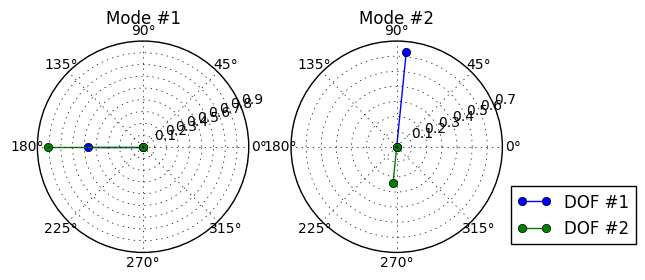

In [24]:
fig, ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))
for mode in range(2):
    ax[mode].set_title('Mode #{}'.format(mode+1))
    for dof in range(2):
        r = np.array([0, np.absolute(v1[dof,2*mode])])
        t = np.array([0, np.angle(v1[dof,2*mode])])
        ax[mode].plot(t, r, 'o-', label='DOF #{}'.format(dof+1))
plt.legend(loc='lower left', bbox_to_anchor=(1., 0.))
plt.show()

[Back to top](#top)

## Non proportionally damped system

In non proportionally damped systems the damping matrix is not proportional neither to the mass matrix nor the stiffness matrix. Let us consider the following damping matrix:

In [25]:
C2 = np.matrix([[0.4, -0.1],[-0.1, 0.1]])
print(C2)

[[ 0.4 -0.1]
 [-0.1  0.1]]


Non proportinal damping carries the fact that the damping matrix is not orthogonal anymore:

In [26]:
print(np.round_(F1.T*C2*F1, 4))

[[ 0.0889  0.0937]
 [ 0.0937  0.4282]]


The system matrix is the following:

In [27]:
A = np.bmat([[np.zeros_like(MM), np.identity(MM.shape[0])], [LA.solve(-MM,KK), LA.solve(-MM,C2)]])
print(A)

[[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [-1.          0.5        -0.2         0.05      ]
 [ 0.33333333 -0.33333333  0.03333333 -0.03333333]]


The eigenanalysis yields the eigenvalues and eigenvectors:

In [28]:
w2, v2 = LA.eig(A)
ix = np.argsort(np.absolute(w2))
w2 = w2[ix]
v2 = v2[:,ix]
print(np.round_(w2, 4))
print(np.round_(v2, 4))

[-0.0162+0.3736j -0.0162-0.3736j -0.1005+1.0872j -0.1005-1.0872j]
[[ 0.4703-0.0167j  0.4703+0.0167j  0.0580+0.6276j  0.0580-0.6276j]
 [ 0.8099+0.j      0.8099-0.j     -0.0473-0.2382j -0.0473+0.2382j]
 [-0.0014+0.1759j -0.0014-0.1759j -0.6881+0.j     -0.6881-0.j    ]
 [-0.0131+0.3026j -0.0131-0.3026j  0.2638-0.0275j  0.2638+0.0275j]]


As we can see, the eigenvalues come in complex conjugate pairs. Again, let us take only the ones in the [upper half-plane](http://en.wikipedia.org/wiki/Upper_half-plane):

In [29]:
print(np.round_(w2[[0,2]], 4))

[-0.0162+0.3736j -0.1005+1.0872j]


These complex eigenvalues can be decomposed into angular frequency and damping coefficient much like in the propotional damping case:

In [30]:
zw = -w2.real # damping coefficient time angular frequency
wD = w2.imag # damped angular frequency
zn = 1./np.sqrt(1.+(wD/-zw)**2) # the minus sign is formally correct!
wn = zw/zn # undamped angular frequency
print('Angular frequency: {}'.format(wn[[0,2]]))
print('Damping coefficient: {}'.format(zn[[0,2]]))

Angular frequency: [ 0.37392474  1.09179266]
Damping coefficient: [ 0.04326203  0.09204121]


Again, the columns of the modal matrix, the modal vectors, come in conjugate pairs, and each vector has unit norm:

In [31]:
print(LA.norm(v2[:,[0,2]], axis=0))

[ 1.  1.]


Moreover, the modal matrix is composed of four blocks, each with $NDOF \times NDOF$ dimension. Some column reordering is necessary in order to match both modal matrices:

In [32]:
AA = v2[:2,[0,2]]
AB = AA.conjugate()
BA = np.multiply(AA,w2[[0,2]])
BB = BA.conjugate()
v2_new = np.bmat([[AA, AB], [BA, BB]])
print(np.round_(v2_new[:,[0,2,1,3]], 4))

[[ 0.4703-0.0167j  0.4703+0.0167j  0.0580+0.6276j  0.0580-0.6276j]
 [ 0.8099+0.j      0.8099-0.j     -0.0473-0.2382j -0.0473+0.2382j]
 [-0.0014+0.1759j -0.0014-0.1759j -0.6881-0.j     -0.6881+0.j    ]
 [-0.0131+0.3026j -0.0131-0.3026j  0.2638-0.0275j  0.2638+0.0275j]]


Once more we will visualize the complex valued modal vectors through a polar plot of the corresponding amplitudes and angles:

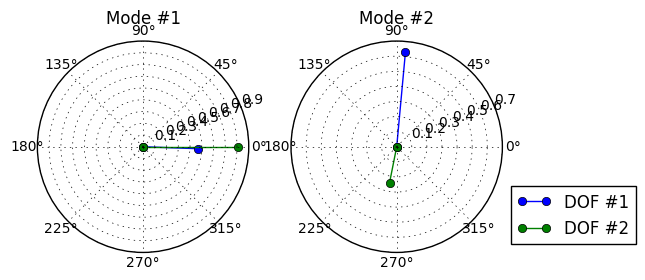

In [33]:
fig, ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))
for mode in range(2):
    ax[mode].set_title('Mode #{}'.format(mode+1))
    for dof in range(2):
        r = np.array([0, np.absolute(v2[dof,2*mode])])
        t = np.array([0, np.angle(v2[dof,2*mode])])
        ax[mode].plot(t, r, 'o-', label='DOF #{}'.format(dof+1))
plt.legend(loc='lower left', bbox_to_anchor=(1., 0.))
plt.show()

[Back to top](#top)

## Conclusions

Several conclusion can be drawn from this very simple example. First of all, damping changes the vibration frequencies and mode shapes. Furthermore, the polar plots show clearly that:

1. In the undamped system the vibration modes are fully "orthogonal";
2. In the proportionally damped system the vibration modes are no longer "orthogonal";
3. In the non proportionally damped system each DOF has a different phase angle.

[Back to top](#top)

## Odds and ends

This notebook was created by Paulo Xavier Candeias.

[Back to top](#top)